# 목표: 예측 컴피티션, 중간은 가보자!

In [2]:
# matplotlib은 python의 대표적인 시각화 라이브러리입니다. 이렇게 해줘야 주피터 노트북 내에서 matplotlib이 그린 그래프를 볼 수 있어요.
# 그래프는 아래 내리시다보면 있습니다!
%matplotlib inline

In [3]:
# 판다스는 일반적으로 이렇게 임포트합니다.
import pandas as pd

In [4]:
# 로컬에 있는 csv 파일 읽기.
train = pd.read_csv('funda_train.csv')

# 문제

## 상점별 매출예측
핀테크 기업인 ‘FUNDA(펀다)’는 상환 기간의 매출을 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 상점들에 금융 기회를 제공하려 합니다.  
이번 대회에서는  2년 전 부터 2019년 2월 28일까지의 카드 거래 데이터를 이용해 **2019-03-01부터 2019-05-31까지의 각 상점별 3개월 총 매출을 예측**하는 것입니다.

# Data description
1. store_id : 상점의 고유 아이디
2. card_id : 사용한 카드의 고유 아이디
3. card_company : 비식별화된 카드 회사
4. trasacted_date : 거래 날짜
5. transacted_time : 거래 시간( 시:분 )
6. installment_term : 할부 개월 수( 포인트 사용 시 (60개월 + 실제할부개월)을 할부개월수에 기재한다. )
7. region : 상점의 지역
8. type_of_business : 상점의 업종
9. amount : 거래액(단위는 원이 아닙니다)

In [5]:
train.tail(2)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571
6556612,2136,4658616,c,2019-02-28,23:54,0,제주 제주시,기타 주점업,5857.142857


In [6]:
len(train['type_of_business'].unique())

146

In [7]:
# 데이터 시작일
train['transacted_date'].min()

'2016-06-01'

In [8]:
# 데이터 종료일
train['transacted_date'].max()

'2019-02-28'

In [9]:
# 컬럼별 데이터의 타입
'''
store_id, card_id, installment_term: 정수형
card_company, transacted_date, transacted_time, region, type_of_business: 문자열
amount: 실수형
'''

train.dtypes

store_id              int64
card_id               int64
card_company         object
transacted_date      object
transacted_time      object
installment_term      int64
region               object
type_of_business     object
amount              float64
dtype: object

In [10]:
train['card_company'].unique()

array(['b', 'h', 'c', 'a', 'f', 'e', 'g', 'd'], dtype=object)

In [11]:
train.shape

(6556613, 9)

In [12]:
print('Length of train: ' + str(len(train)))

Length of train: 6556613


In [13]:
# 데이터 길이, 가짓수 등. unique() 함수
print('Length of Train: ' + str(len(train)))
print('Store Id: ' + str(len(train['store_id'].unique())))
print('Type of Business: ' + str(len(train['type_of_business'].unique())))
print('Card Id: ' + str(len(train['card_id'].unique())))
print('Transacted Date: ' + str(len(train['transacted_date'].unique())))

Length of Train: 6556613
Store Id: 1967
Type of Business: 146
Card Id: 3950001
Transacted Date: 1003


In [14]:
# 데이터가 언제부터 언제까지 있는지? min(), max() 함수
print('first date of log: ' + train['transacted_date'].min())
print('last date of log: ' + train['transacted_date'].max())

first date of log: 2016-06-01
last date of log: 2019-02-28


In [15]:
# train['type_of_business'].unique()
train['card_company'].unique()

array(['b', 'h', 'c', 'a', 'f', 'e', 'g', 'd'], dtype=object)

# Missing Values
* region에는 30%, type_of_business에는 60% 정도 null이 있네요. 어떻게 할지는 좀 더 생각을 해봅시다.

In [16]:
train.isnull().sum() * 100 / len(train)

store_id             0.000000
card_id              0.000000
card_company         0.000000
transacted_date      0.000000
transacted_time      0.000000
installment_term     0.000000
region              31.155812
type_of_business    60.284311
amount               0.000000
dtype: float64

# Outlier
* 이것도 모델에 어떻게 반영할건지는 좀 더 생각을 해봅시다.

In [17]:
train['amount'].describe()

count    6.556613e+06
mean     1.043511e+04
std      3.104031e+04
min     -2.771429e+06
25%      2.142857e+03
50%      4.285714e+03
75%      8.571429e+03
max      5.571429e+06
Name: amount, dtype: float64

In [18]:
# -값은 결제취소값

In [19]:
print(train['amount'].min())
print(train['amount'].quantile(0.01))
print(train['amount'].quantile(0.99))
print(train['amount'].max())

-2771428.5714285714
-157.1428571428571
108571.42857142855
5571428.571428572


## Winsorize

In [20]:
# Setting cap
amount_min = train['amount'].quantile(0.01)
amount_max = train['amount'].quantile(0.99)

In [21]:
train['amount_winsorized'] = train['amount'].apply(lambda x: max(min(x, amount_max), amount_min))

In [22]:
train.head(2)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,amount_winsorized
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,857.142857


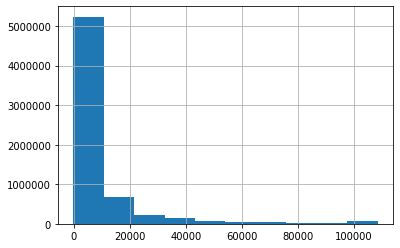

In [23]:
train['amount_winsorized'].hist()

# Seasonality
* yearly seasonality, monthly seasonality가 명확하게 보이는 데이터인가?

In [24]:
train = train.reset_index()

In [25]:
transaction_day = train.groupby(['transacted_date']).agg({'index':'size', 'amount':'sum'}).reset_index()

In [26]:
transaction_day.head(2)

,transacted_date,index,amount
0,2016-06-01,4789,6.520140e+07
1,2016-06-02,4953,5.711538e+07


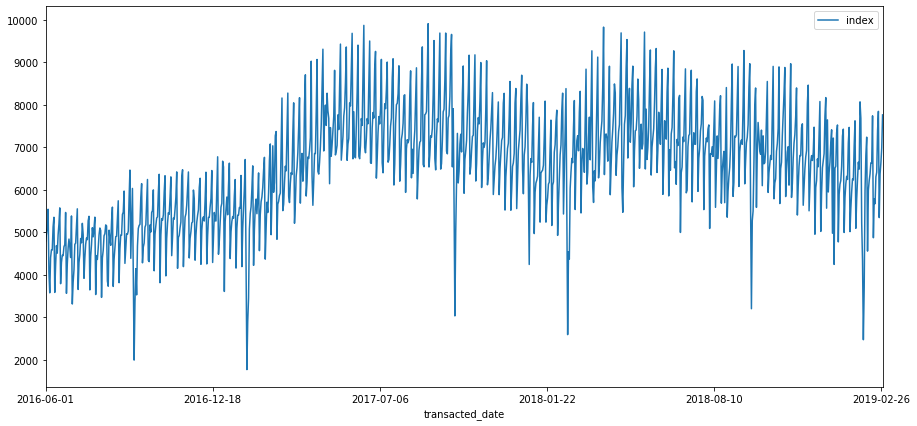

In [27]:
# 뭔가 오르락 내리락에 패턴이 있어 보이네요

transaction_day.plot(x='transacted_date', y='index', figsize=(15, 7))

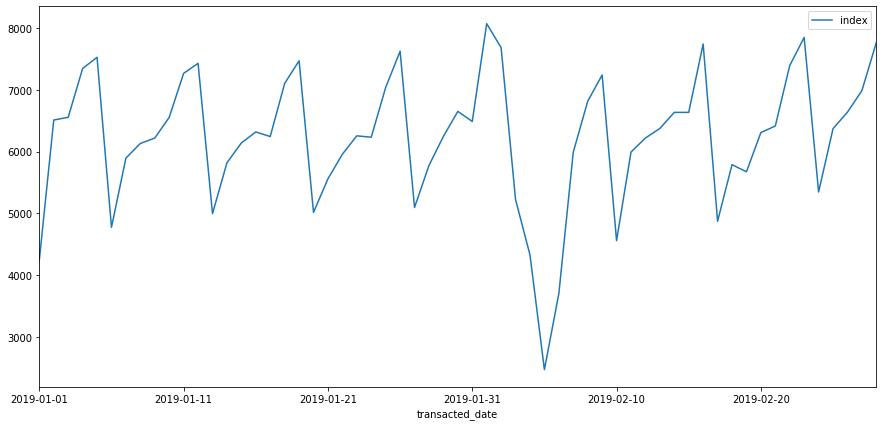

In [28]:
# 주 단위 Seasonality는 명확하게 보이네요. 그런데 매출이 저렇게 푹 꺼진데는 무슨일이 있었던 걸까요?
transaction_day.set_index('transacted_date').loc['2019-01-01':,:].plot(y='index', figsize=(15,7))

## 또 다른 패턴?

In [29]:
train['transacted_date_month'] = train['transacted_date'].apply(lambda x: x[:7])

In [30]:
train_groupby_month = train.groupby(['transacted_date_month'])['amount'].sum()

In [31]:
import matplotlib.pyplot as plt

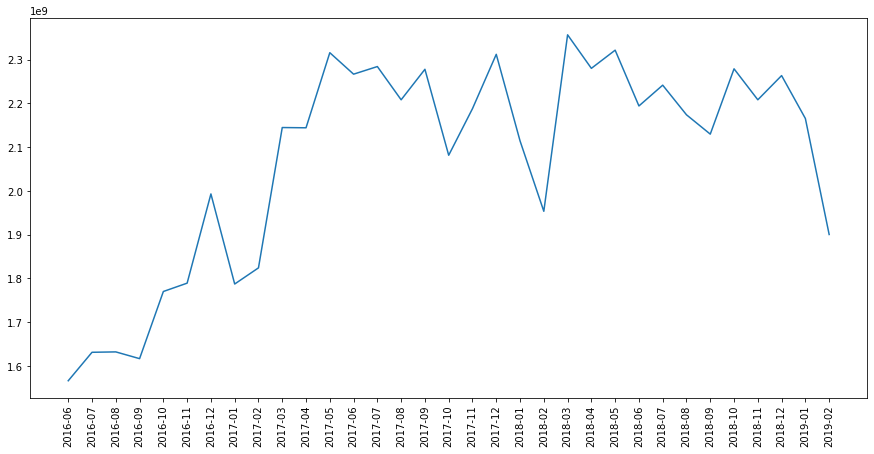

In [32]:
plt.figure(figsize=(15,7))
plt.plot(train_groupby_month)
plt.xticks(rotation='vertical')
plt.show()

## 데이터를 연도별로 따로 보면 패턴이 더 잘 보일 것 같다.

In [33]:
train['transacted_date'] = pd.to_datetime(train['transacted_date'])

In [34]:
train['transacted_year'] = train['transacted_date'].apply(lambda x: x.year)
train['transacted_month'] = train['transacted_date'].apply(lambda x: x.month)

In [35]:
train_pivoted = train.pivot_table(index='transacted_month', columns='transacted_year', values='amount')
train_pivoted

transacted_year,2016,2017,2018,2019
transacted_month,,,,
1,NaN,11280.850526,10663.802979,11133.457565
2,NaN,11331.731309,10734.281138,10977.741399
3,NaN,10729.185262,10466.454710,NaN
4,NaN,10067.218046,10217.877977,NaN
5,NaN,9824.485692,9864.326277,NaN
6,11296.789567,9709.276674,9782.579202,NaN
7,11360.205607,9710.072827,10137.907888,NaN
8,11166.016320,9647.924505,10211.079958,NaN
9,10965.315317,9636.220566,10064.683250,NaN


In [36]:
train_pivoted.columns = [str(c) for c in train_pivoted.columns]

In [37]:
train_pivoted = train_pivoted.reset_index()

In [38]:
[i+1 for i in list(range(12))]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

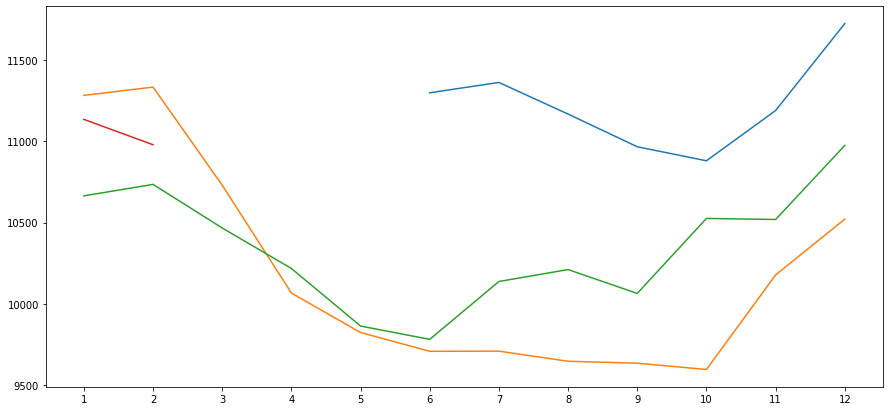

In [39]:
plt.figure(figsize=(15,7))
plt.plot('transacted_month', '2016', data=train_pivoted)
plt.plot('transacted_month', '2017', data=train_pivoted)
plt.plot('transacted_month', '2018', data=train_pivoted)
plt.plot('transacted_month', '2019', data=train_pivoted)
plt.xticks([i+1 for i in list(range(12))])
plt.show()

# 베이스라인
문제: 2019-03-01 ~ 2019-05-31 3개월 동안의 총 매출을 예측  
베이스라인: 2018-03-01 ~ 2018-05-31일 동안의 총 매출을 답으로 제출

In [40]:
temp = train[(train['transacted_date'] >= '2018-03-01') & (train['transacted_date'] <= '2018-05-31')]
temp.groupby('store_id')['amount'].sum()

store_id
0       2.171000e+06
1       2.977143e+05
2       9.461429e+05
4       2.475643e+06
5       1.111857e+06
6       6.033929e+06
7       1.644929e+06
8       3.449000e+06
9       1.974000e+06
10      1.103857e+06
11      1.023286e+06
12      6.784486e+05
13      3.136757e+06
14      1.056986e+07
15      3.495500e+06
16      1.529714e+06
17      8.347429e+05
18      1.460529e+06
19      4.526571e+06
20      2.700500e+06
22      7.015714e+05
23      1.696429e+06
24      1.144439e+07
25      3.048571e+05
26      1.113714e+06
27      6.842593e+06
28      4.070300e+06
29      2.926571e+06
30      7.284614e+05
31      2.122857e+06
            ...     
2105    1.815643e+06
2106    4.705000e+06
2107    3.772143e+05
2108    9.143414e+06
2109    7.760300e+06
2110    5.474286e+05
2111    3.819429e+06
2112    7.864993e+06
2113    4.966486e+06
2114    9.991857e+06
2115    3.199986e+06
2116    4.241214e+06
2117    5.175714e+05
2118    2.772571e+06
2120    1.579367e+07
2121    8.320414e+06
2122

In [133]:
train_last_year = train[(train['transacted_date'] >= '2018-03-01') & (train['transacted_date'] <= '2018-05-31')]

In [137]:
train_last_year.groupby(['store_id'])['amount'].sum().to_csv('./baseline.csv')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# 이외에 생각 해볼거리

### Q1. 업종전환을 한 가게가 있나요?

### Q2. 상점의 지역 별 분포는 어떻게 되나요?

### Q3. 상점의 업종 별 분포는 어떻게 되나요?

### Q4. 요일 별 매출은 어떻게 변하나요?

### Q5. 공휴일이 매출에 영향을 미치나요?

### Q6. 요일 별 Seasonality 말고, 또 다른 기간 별 패턴을 발견했나요?

### Q7. 새로운 질문을 던져보세요.